In [138]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [147]:
def histogramImg(mat, K=256):
    r"""Receives a single channel image in matrix form and 
    returns a numpy array of size K, representing the histogram values 
    of the image such that vec[x] = number of points in the image of value x"""
    vec = np.zeros(K)
    for row in mat:
        for value in row:
            vec[value] += 1
    return vec

In [148]:
def FSHS(mat, K=256):
    r""""Receives a single channel image in matrix form and returns 
    the full scale histogram strech from [0, K]
    WARNING, returns doubles, for conversion simply use np.uint8(res)"""
    A = np.min(mat)
    B = np.max(mat)
    fhsh = mat.copy()
    if(B == A):
        return fhsh
    fhsh = (mat-A)*(K-1)/(B-A)
    return fhsh

In [149]:
def PointOperation(mat, f):
    r"""Given a matrix and a point function operator, 
    performs the point function operation and returns the result"""
    matCopy = mat.copy()
    matCopy = matCopy.reshape(-1)
    result = np.zeros(matCopy.size)
    for i, x in enumerate(matCopy):
        result[i] = x
        result[i] = f(result[i])
    result = result.reshape(mat.shape)
    return result


In [162]:
def ImageEqualization(mat, K = 256):
    r"""Equalizes a single channel image"""
    hist = histogramImg(mat, K)
    acumulativeHist = hist.copy()
    for i in range(1, len(acumulativeHist)):
        acumulativeHist[i] += acumulativeHist[i-1]
    res = np.uint8(FSHS(PointOperation(mat, lambda x: acumulativeHist[int(x)]), K))
    return res


# Grey Image Processing.
## Full scale histogram strech and Image Equalization

Everything in this notebook will asume that I'm working with black and white (single channled) images with a scale from [0, 255] 

##### 1- First we open an image

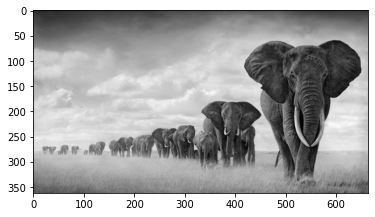

In [151]:
# Open Image
colorRange = 256
imgName = 'bw_img1.jpg'
imgPath = '../dataset/'
imgBGR = cv2.imread(imgPath + imgName)
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
plt.imshow(img, 'gray')
plt.show()

##### 2- We get the histogram for this image.

$$ H_f(k) = J $$
if the image contains exactly $J$ occurences of the level $k \space \forall \space k = 0, \dots, K - 1$  

Note: The FSHS and image equalization fall into a bigger topic called Point Operations. Point operations are operations performed on all pixels on the image, disregarding any information about locallity and neighboring pixels.

With point operations, the histogram is our best friend, since even though it isn't a complete description of an image, it gives usefull information and tools to work with.

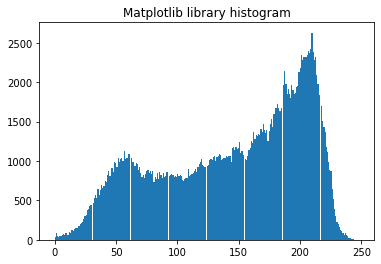

In [164]:
plt.hist(img.reshape(-1), bins=colorRange)
plt.title('Matplotlib library histogram')
plt.show()

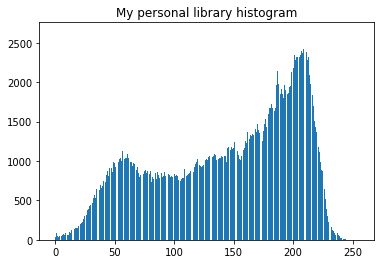

In [166]:
histVec = histogramImg(img, colorRange)
plt.bar(np.arange(colorRange), histVec)
plt.title('My personal library histogram')
plt.show()

3.- We get the normalized image histogram

$$ p_f(k)= \frac{1}{MN}H_f(k)$$
where $H_f(k)$ is the histogram of the image

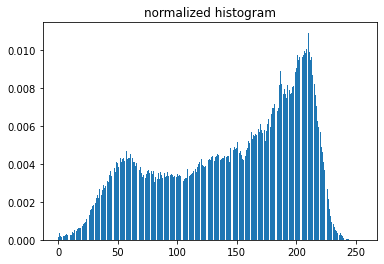

In [167]:
histNorm = histVec/ (img.shape[0]*img.shape[1])
plt.bar(np.arange(colorRange), histNorm)
plt.title('normalized histogram')
plt.show()

##### 4.- Calculate the cumulative normalized image histogram

$$ P_f(r)=\sum_{k=0}^{r}p_f(k); \quad r = 0,\dots,K-1 $$

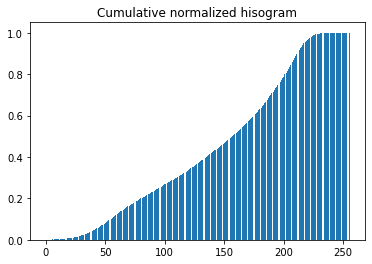

In [168]:
cumulativeHist = histNorm.copy()
for i in range(1, len(cumulativeHist)):
    cumulativeHist[i] = cumulativeHist[i-1] + cumulativeHist[i]
plt.bar(np.arange(colorRange), cumulativeHist)
plt.title('Cumulative normalized hisogram')
plt.show()

##### 5.- Equalize the image. 

Equlizing an image is a 2 step process. First is using the cumulative histogram to replace the values of the image, then doing a FSHS to stretch the resulting histogram

In essence: 
$$ g = Pf(f) $$ 
we simply apply this point operation to the whole image

The definition of FSHS is
$$ FSHS(f) = \left(\frac{K-1}{B-A}\right)[f(\bold{n})-A] $$
Where $A$ is the minimum element of $f$, and $B$ is the maximum element

(362, 664)


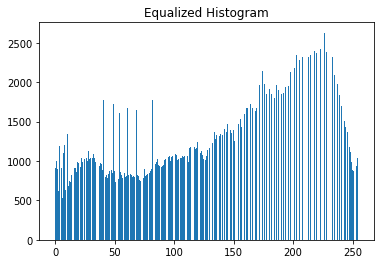

In [169]:
equalizedImage = PointOperation(img, lambda x : cumulativeHist[int(x)])
equalizedImage = np.uint8(FSHS(equalizedImage))
print(equalizedImage.shape)
equalizedHist = histogramImg(equalizedImage)
plt.bar(np.arange(colorRange), equalizedHist)
plt.title('Equalized Histogram')
plt.show()



Text(0.5, 1.0, 'Original Image')

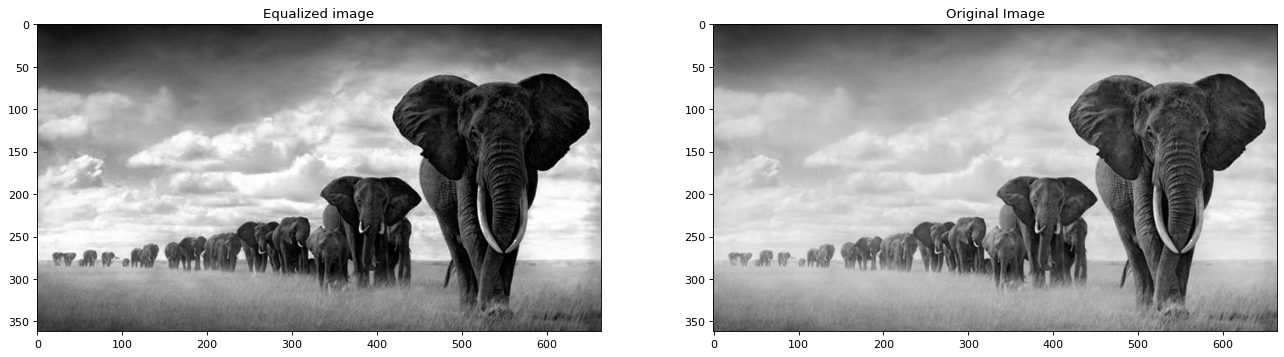

In [157]:
figure(figsize=(20, 6), dpi=80)
plt.subplot(1,2, 1)
plt.imshow(equalizedImage, cmap='gray')
plt.title('Equalized image')
plt.subplot(1,2, 2)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

### Equalizing other image

Text(0.5, 1.0, 'Original Image')

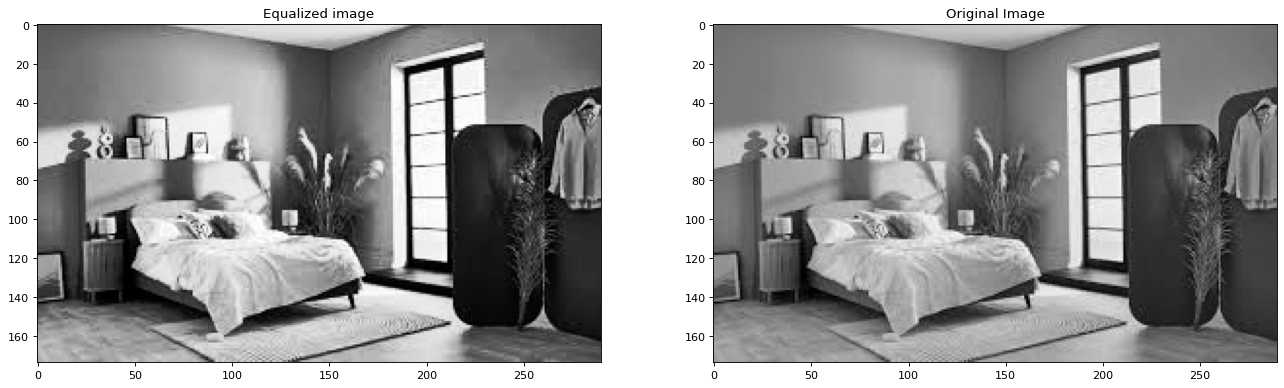

In [172]:
# Open Image
imgName = 'color_img1.jpeg'
imgBGR = cv2.imread(imgPath + imgName)
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
equalizedImage = ImageEqualization(img)
figure(figsize=(20, 6), dpi=80)
plt.subplot(1,2, 1)
plt.imshow(equalizedImage, cmap='gray')
plt.title('Equalized image')
plt.subplot(1,2, 2)
plt.imshow(img, cmap='gray')
plt.title('Original Image')